<a href="https://colab.research.google.com/github/sunnysunil611/CodeAlpha_Attendance_Management_System/blob/main/VISUALIZATION_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# VISUALIZATION 8

import numpy as np

data = np.load("/content/flows.npz")


#Extract Arrays
t = data['t']
xA = data['xA']
xB = data['xB']
xC = data['xC']


#shapes to understand the data
print("Time shape:", t.shape)
print("xA shape:", xA.shape)
print("xB shape:", xB.shape)
print("xC shape:", xC.shape)


Time shape: (51,)
xA shape: (51, 5000, 2)
xB shape: (51, 5000, 2)
xC shape: (51, 5000, 2)


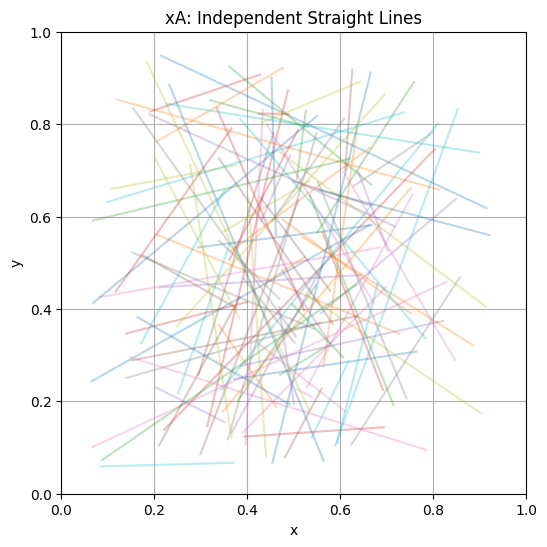

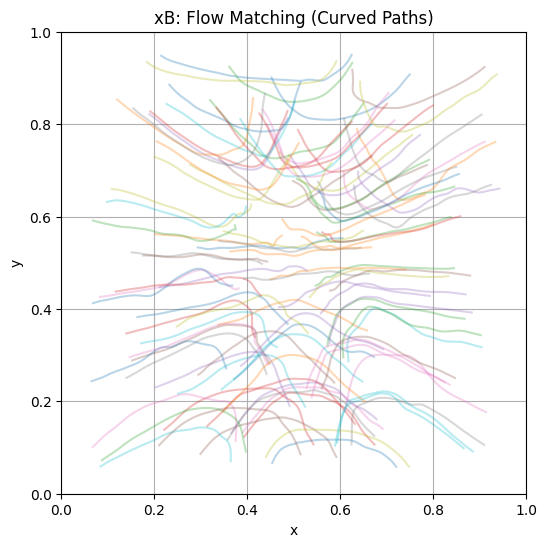

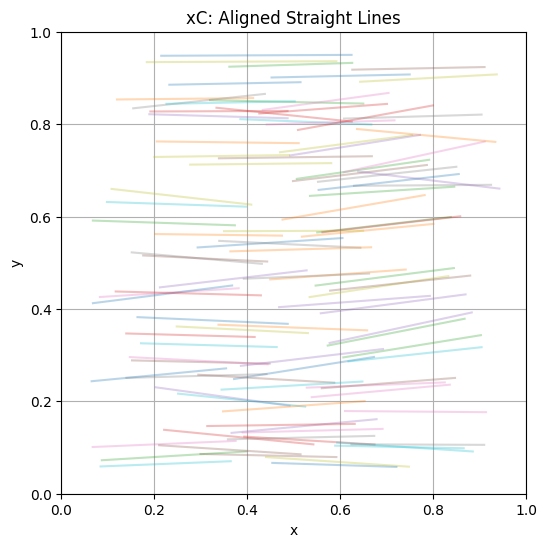

In [3]:
import matplotlib.pyplot as plt

#trajectories for the first 100 particles

def plot_trajectories(x, title):
    plt.figure(figsize=(6, 6))
    for i in range(100):
        plt.plot(x[:, i, 0], x[:, i, 1], alpha=0.3)  # plot path of particle i
    plt.title(title)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

plot_trajectories(xA, "xA: Independent Straight Lines")
plot_trajectories(xB, "xB: Flow Matching (Curved Paths)")
plot_trajectories(xC, "xC: Aligned Straight Lines")


In [8]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import matplotlib.pyplot as plt

def animate_particles(x, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    scat = ax.scatter(x[0, :300, 0], x[0, :300, 1], s=10)

    def update(frame):
        scat.set_offsets(x[frame, :300])
        ax.set_title(f"{title} - t={t[frame]:.2f}")
        return scat,

    ani = FuncAnimation(fig, update, frames=len(t), interval=100, blit=True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    return HTML(ani.to_jshtml())  #for Colab!


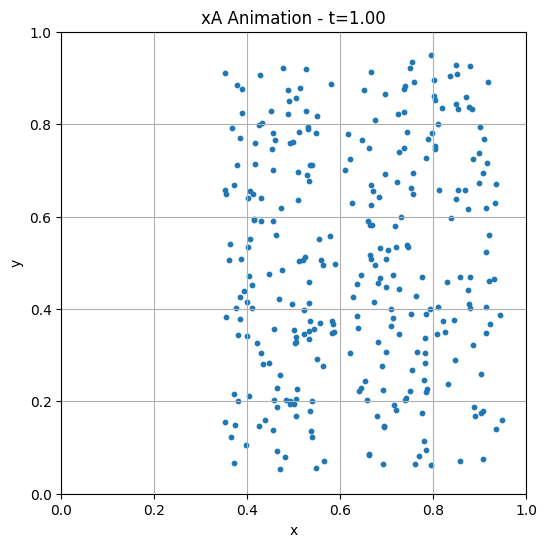

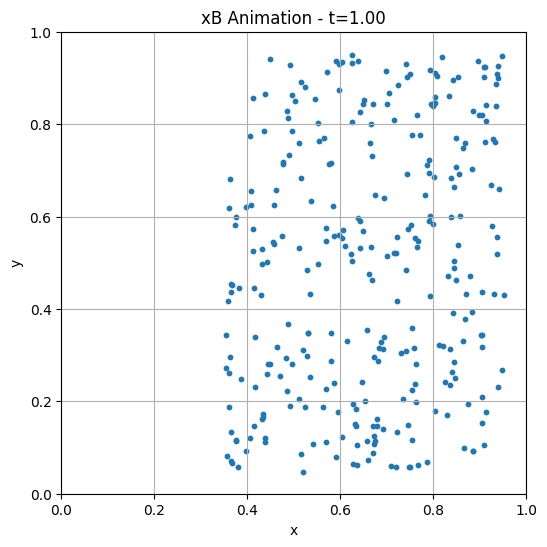

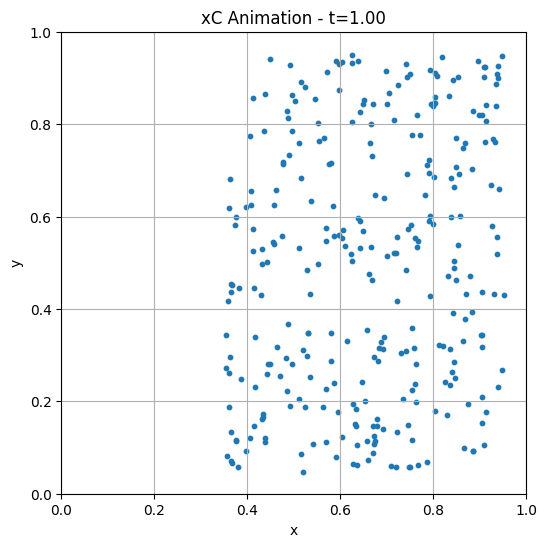

In [9]:
display(animate_particles(xA, "xA Animation"))
display(animate_particles(xB, "xB Animation"))
display(animate_particles(xC, "xC Animation"))


In [10]:
import matplotlib.pyplot as plt

def plot_density(x, title):
    for frame in range(0, len(t), 10):  # every 10 steps
        plt.figure(figsize=(5, 4))
        plt.hist2d(x[frame, :, 0], x[frame, :, 1], bins=50, range=[[0,1],[0,1]], cmap='viridis')
        plt.colorbar(label="Density")
        plt.title(f"{title} at t={t[frame]:.2f}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.tight_layout()
        plt.show()

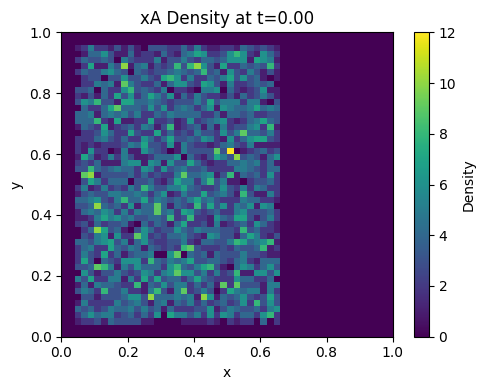

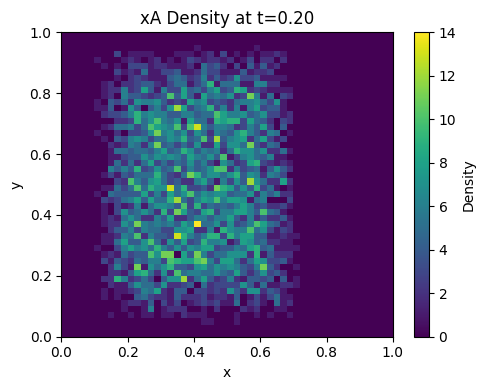

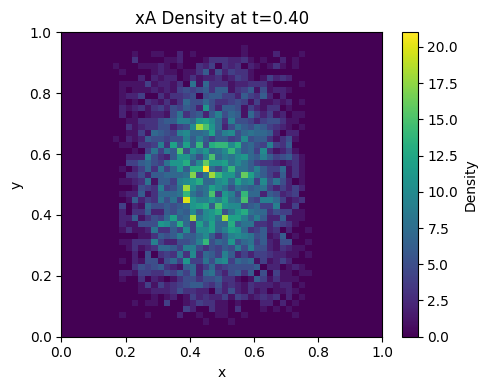

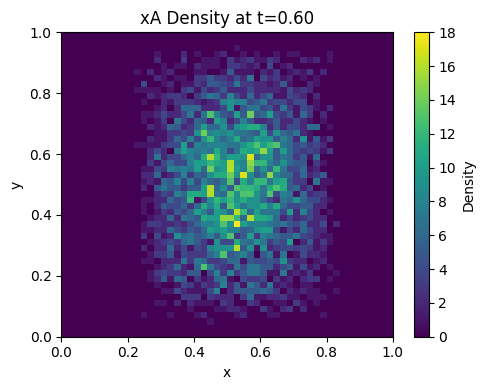

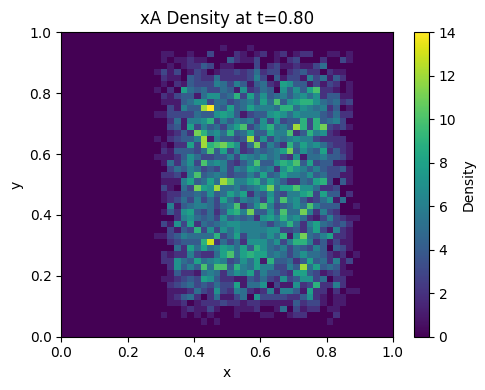

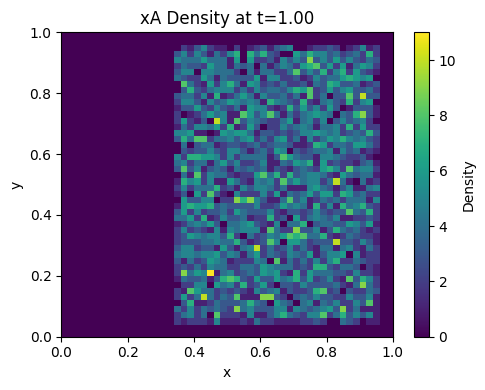

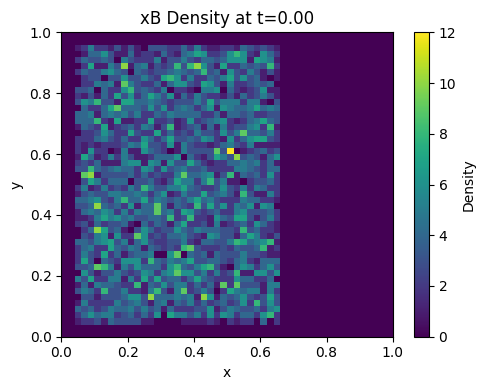

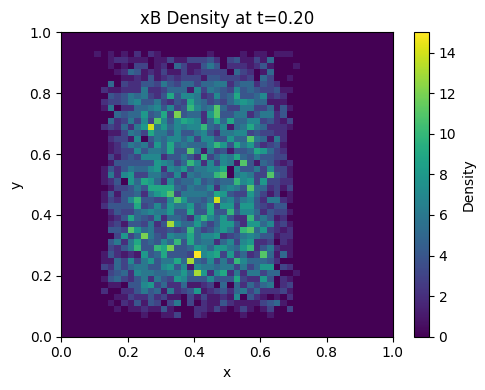

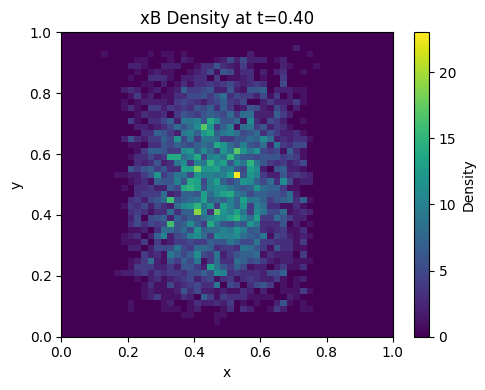

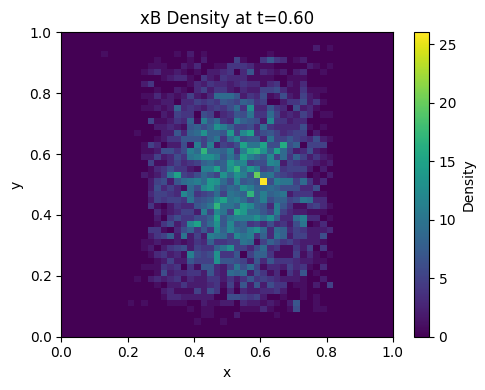

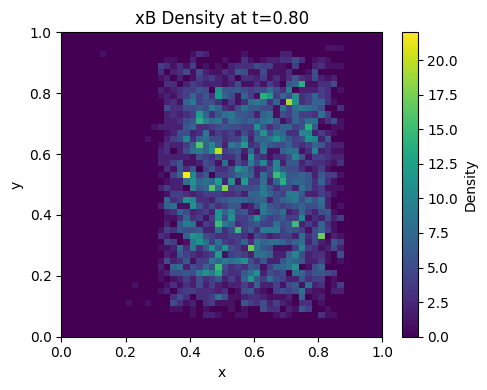

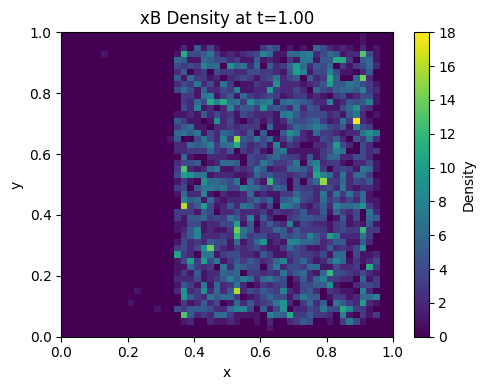

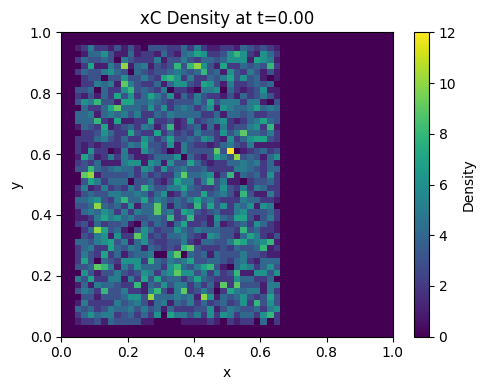

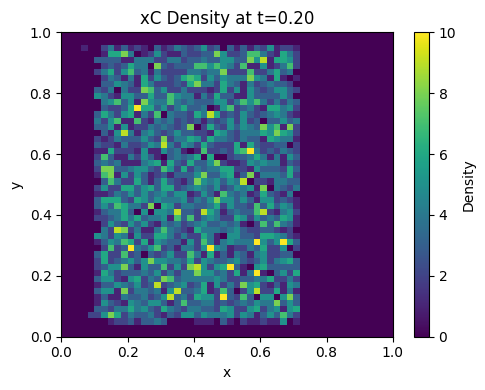

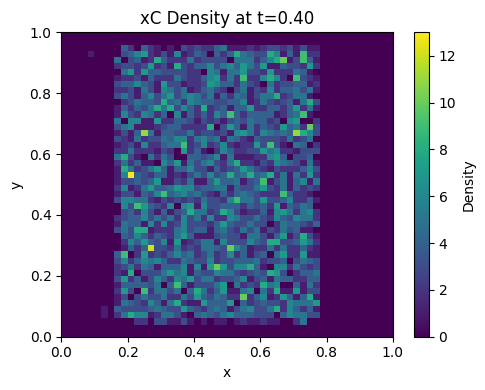

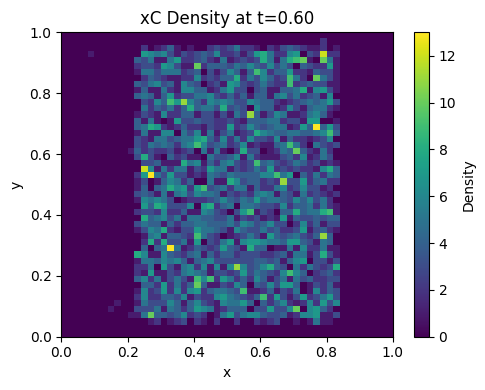

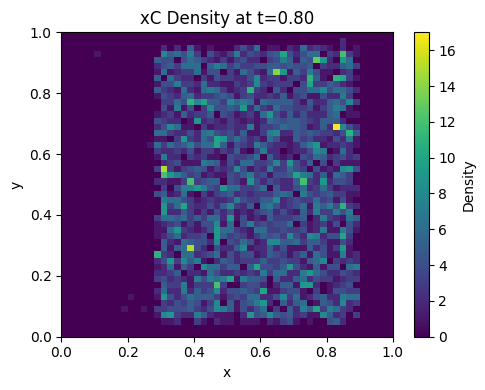

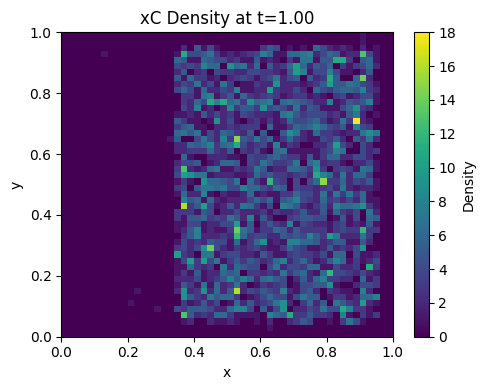

In [12]:
plot_density(xA, "xA Density")
plot_density(xB, "xB Density")
plot_density(xC, "xC Density")